In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score, RocCurveDisplay

import matplotlib.pyplot as plt

In [3]:
# Load the data
df = pd.read_excel("gym.xlsx")
df.head()

,Enroll,Age,Income,Hours
0,1,26,18000,14
1,0,43,13000,9
2,1,55,42000,16
3,1,55,100000,13
4,0,55,13000,12


In [4]:
df.describe()

,Enroll,Age,Income,Hours
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.403000,44.582000,68340.000000,10.182000
std,0.490746,13.876737,44466.928247,4.671263
min,0.000000,21.000000,1000.000000,2.000000
25%,0.000000,32.000000,31000.000000,6.000000
50%,0.000000,45.000000,64000.000000,10.000000
75%,1.000000,57.000000,97000.000000,14.000000
max,1.000000,68.000000,198000.000000,18.000000


In [5]:
df.shape

(1000, 4)

In [6]:
indAtts = ["Age", "Income", "Hours"]
depAtt = "Enroll"

In [7]:
# Separate features and target variable
Xs = df[indAtts]
Xs.head()

,Age,Income,Hours
0,26,18000,14
1,43,13000,9
2,55,42000,16
3,55,100000,13
4,55,13000,12


In [8]:
y = df[depAtt]
y


0      1
1      0
2      1
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Enroll, Length: 1000, dtype: int64

In [9]:
# Scale the features
scaler = StandardScaler()
XsScaled = scaler.fit_transform(Xs)
XsScaled

array([[-1.33974561, -1.13264376,  0.81774684],
       [-0.11406079, -1.24514314, -0.25316311],
       [ 0.7511285 , -0.59264674,  1.24611082],
       ...,
       [ 0.7511285 ,  0.03734979,  1.46029281],
       [ 1.68841689, -0.09764946,  1.03192883],
       [ 0.24643475, -0.03014983,  1.6744748 ]])

In [10]:
# Combine scaled features and target into a new DataFrame
dfScaled = pd.DataFrame(XsScaled, columns=Xs.columns)
dfScaled[depAtt] = y.astype('category')
dfScaledx

,Age,Income,Hours,Enroll
0,-1.339746,-1.132644,0.817747,1
1,-0.114061,-1.245143,-0.253163,0
2,0.751128,-0.592647,1.246111,1
3,0.751128,0.712346,0.603565,1
4,0.751128,-1.245143,0.389383,0
...,...,...,...,...
995,-0.402457,-1.425142,0.603565,0
996,-0.474556,-1.425142,-1.538255,0
997,0.751128,0.037350,1.460293,1
998,1.688417,-0.097649,1.031929,1


In [14]:
dfScaled[indAtts].describe()

,Age,Income,Hours
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-5.861978e-17,1.776357e-18,-1.039169e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.700241e+00,-1.515142e+00,-1.752437e+00
25%,-9.071510e-01,-8.401454e-01,-8.957091e-01
50%,3.013743e-02,-9.764946e-02,-3.898112e-02
75%,8.953267e-01,6.448464e-01,8.177468e-01
max,1.688417e+00,2.917334e+00,1.674475e+00


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    dfScaled[indAtts],
    dfScaled[depAtt],
    test_size=0.4,
    random_state=1,
    stratify=dfScaled[depAtt]
)


In [12]:
X_train.head()

,Age,Income,Hours
808,0.030137,0.824845,1.674475
393,-0.618755,-0.975145,0.175201
416,-0.979250,-1.425142,0.817747
486,0.679029,-1.065144,0.817747
422,-0.114061,-1.267643,-1.324073


In [15]:
# Perform k-NN classification with cross-validation to find the best k
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 11))}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [16]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.915


In [17]:
# Display detailed results
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001585,0.001017,0.003736,0.000511,1,{'n_neighbors': 1},0.866667,0.908333,0.866667,0.900000,0.916667,0.891667,0.021082,9
1,0.000750,0.000118,0.003016,0.000282,2,{'n_neighbors': 2},0.833333,0.858333,0.883333,0.866667,0.866667,0.861667,0.016330,10
2,0.000584,0.000023,0.002525,0.000068,3,{'n_neighbors': 3},0.908333,0.916667,0.883333,0.933333,0.900000,0.908333,0.016667,2
3,0.000517,0.000012,0.002270,0.000040,4,{'n_neighbors': 4},0.850000,0.925000,0.858333,0.933333,0.900000,0.893333,0.033912,8
4,0.000484,0.000006,0.002187,0.000040,5,{'n_neighbors': 5},0.875000,0.941667,0.883333,0.950000,0.925000,0.915000,0.030459,1
5,0.000464,0.000008,0.002098,0.000046,6,{'n_neighbors': 6},0.866667,0.941667,0.858333,0.933333,0.916667,0.903333,0.034400,5
6,0.000441,0.000007,0.002019,0.000033,7,{'n_neighbors': 7},0.875000,0.933333,0.858333,0.941667,0.916667,0.905000,0.032745,4
7,0.000463,0.000039,0.002091,0.000147,8,{'n_neighbors': 8},0.866667,0.933333,0.858333,0.933333,0.908333,0.900000,0.032059,7
8,0.000445,0.000018,0.002025,0.000020,9,{'n_neighbors': 9},0.866667,0.925000,0.883333,0.941667,0.916667,0.906667,0.027588,3
9,0.000444,0.000015,0.002047,0.000054,10,{'n_neighbors': 10},0.841667,0.941667,0.866667,0.941667,0.916667,0.901667,0.040620,6


In [32]:
# Make predictions on the test set
best_knn = grid_search.best_estimator_
new_k = 5  # Replace with the desired k value
best_knn.set_params(n_neighbors=new_k)
predictions = best_knn.predict(X_test)
# Combine y_test and predictions into a DataFrame
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df

,Actual,Predicted
489,1,1
241,0,0
119,0,0
577,0,0
287,0,0
...,...,...
804,1,1
974,1,1
810,1,1
395,0,0


In [33]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Convert confusion matrix to DataFrame with predicted as rows and actual as columns
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Predicted_0', 'Predicted_1'], columns=['Actual_0', 'Actual_1'])
print("Confusion Matrix as DataFrame:")
print(conf_matrix_df)


Confusion Matrix as DataFrame:
             Actual_0  Actual_1
Predicted_0       217        22
Predicted_1        17       144


In [34]:
# Calculate metrics
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.9025
Precision: 0.8674698795180723
Recall (Sensitivity): 0.8944099378881988
Specificity: 0.9079497907949791
F1 Score: 0.8807339449541285


In [35]:
# Predict probabilities for ROC curve
probs= best_knn.predict_proba(X_test)[:, 1]
probs

array([1. , 0. , 0.2, 0.4, 0.2, 0.6, 1. , 0.2, 0.8, 0. , 0. , 0.2, 0. ,
       0. , 0.6, 0.6, 0. , 0. , 0. , 0.8, 1. , 0. , 1. , 0.8, 0. , 0.8,
       0. , 0.2, 1. , 0. , 0.8, 0. , 0.2, 0.2, 0. , 0. , 0.4, 0.4, 0. ,
       1. , 0. , 0.8, 0. , 0.8, 0. , 0.8, 0. , 0.6, 1. , 0.8, 0. , 1. ,
       1. , 0.8, 0.4, 0. , 0.8, 0. , 0.2, 0. , 0.6, 1. , 0.6, 0. , 1. ,
       0. , 0.8, 0. , 0. , 0.2, 0.2, 0.8, 1. , 0. , 0. , 0. , 0.8, 0.4,
       1. , 0. , 0. , 1. , 0. , 0.2, 0. , 0.8, 0. , 1. , 0. , 0. , 0. ,
       0. , 0. , 1. , 1. , 1. , 0. , 1. , 0. , 0. , 0.4, 0.2, 1. , 0. ,
       1. , 0.8, 1. , 1. , 0. , 1. , 0.8, 1. , 1. , 1. , 0. , 0. , 1. ,
       0.8, 0. , 0. , 0.2, 0.8, 0. , 1. , 1. , 1. , 0.8, 1. , 1. , 0.8,
       0.2, 0. , 0. , 0. , 0.6, 0. , 1. , 0.2, 0. , 1. , 0. , 0. , 0.8,
       0.6, 0. , 0. , 0. , 0.2, 0.4, 1. , 0.8, 0. , 1. , 0. , 0. , 1. ,
       1. , 0. , 0.6, 0. , 0. , 0. , 0.2, 0.2, 0.4, 0.2, 0.2, 0.4, 1. ,
       0.8, 0. , 0.8, 0. , 0. , 0.2, 1. , 0. , 0. , 0. , 0. , 1.

In [36]:
roc_auc = roc_auc_score(y_test, probs)
print("ROC AUC:", roc_auc)

ROC AUC: 0.9423191870890616


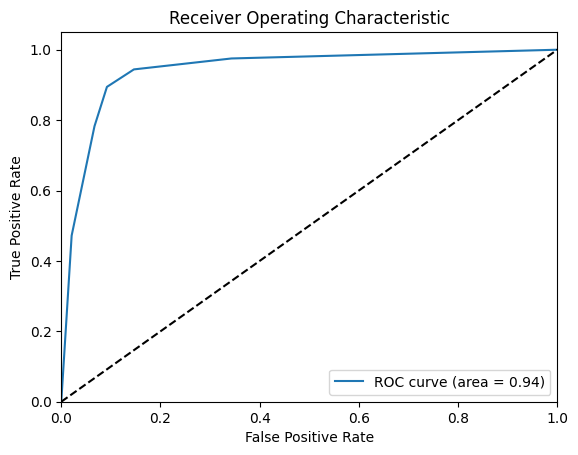

In [37]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, probs )
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()